# Supervised Learning(KNN)

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

In [1]:
## Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load File
tele_data=pd.read_csv("datasets/teleCust1000t.csv")

In [3]:
tele_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [4]:
## check size of data
tele_data.shape

(1000, 12)

In [5]:
## check various data type
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [6]:
## check statistical info of data
tele_data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
## check the missing values in data
tele_data.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

## Data visualiztion and Analysis

In [8]:
## check how many of each class in our data set
tele_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [9]:
tele_data.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


#### Plot a pair plot and note down important point

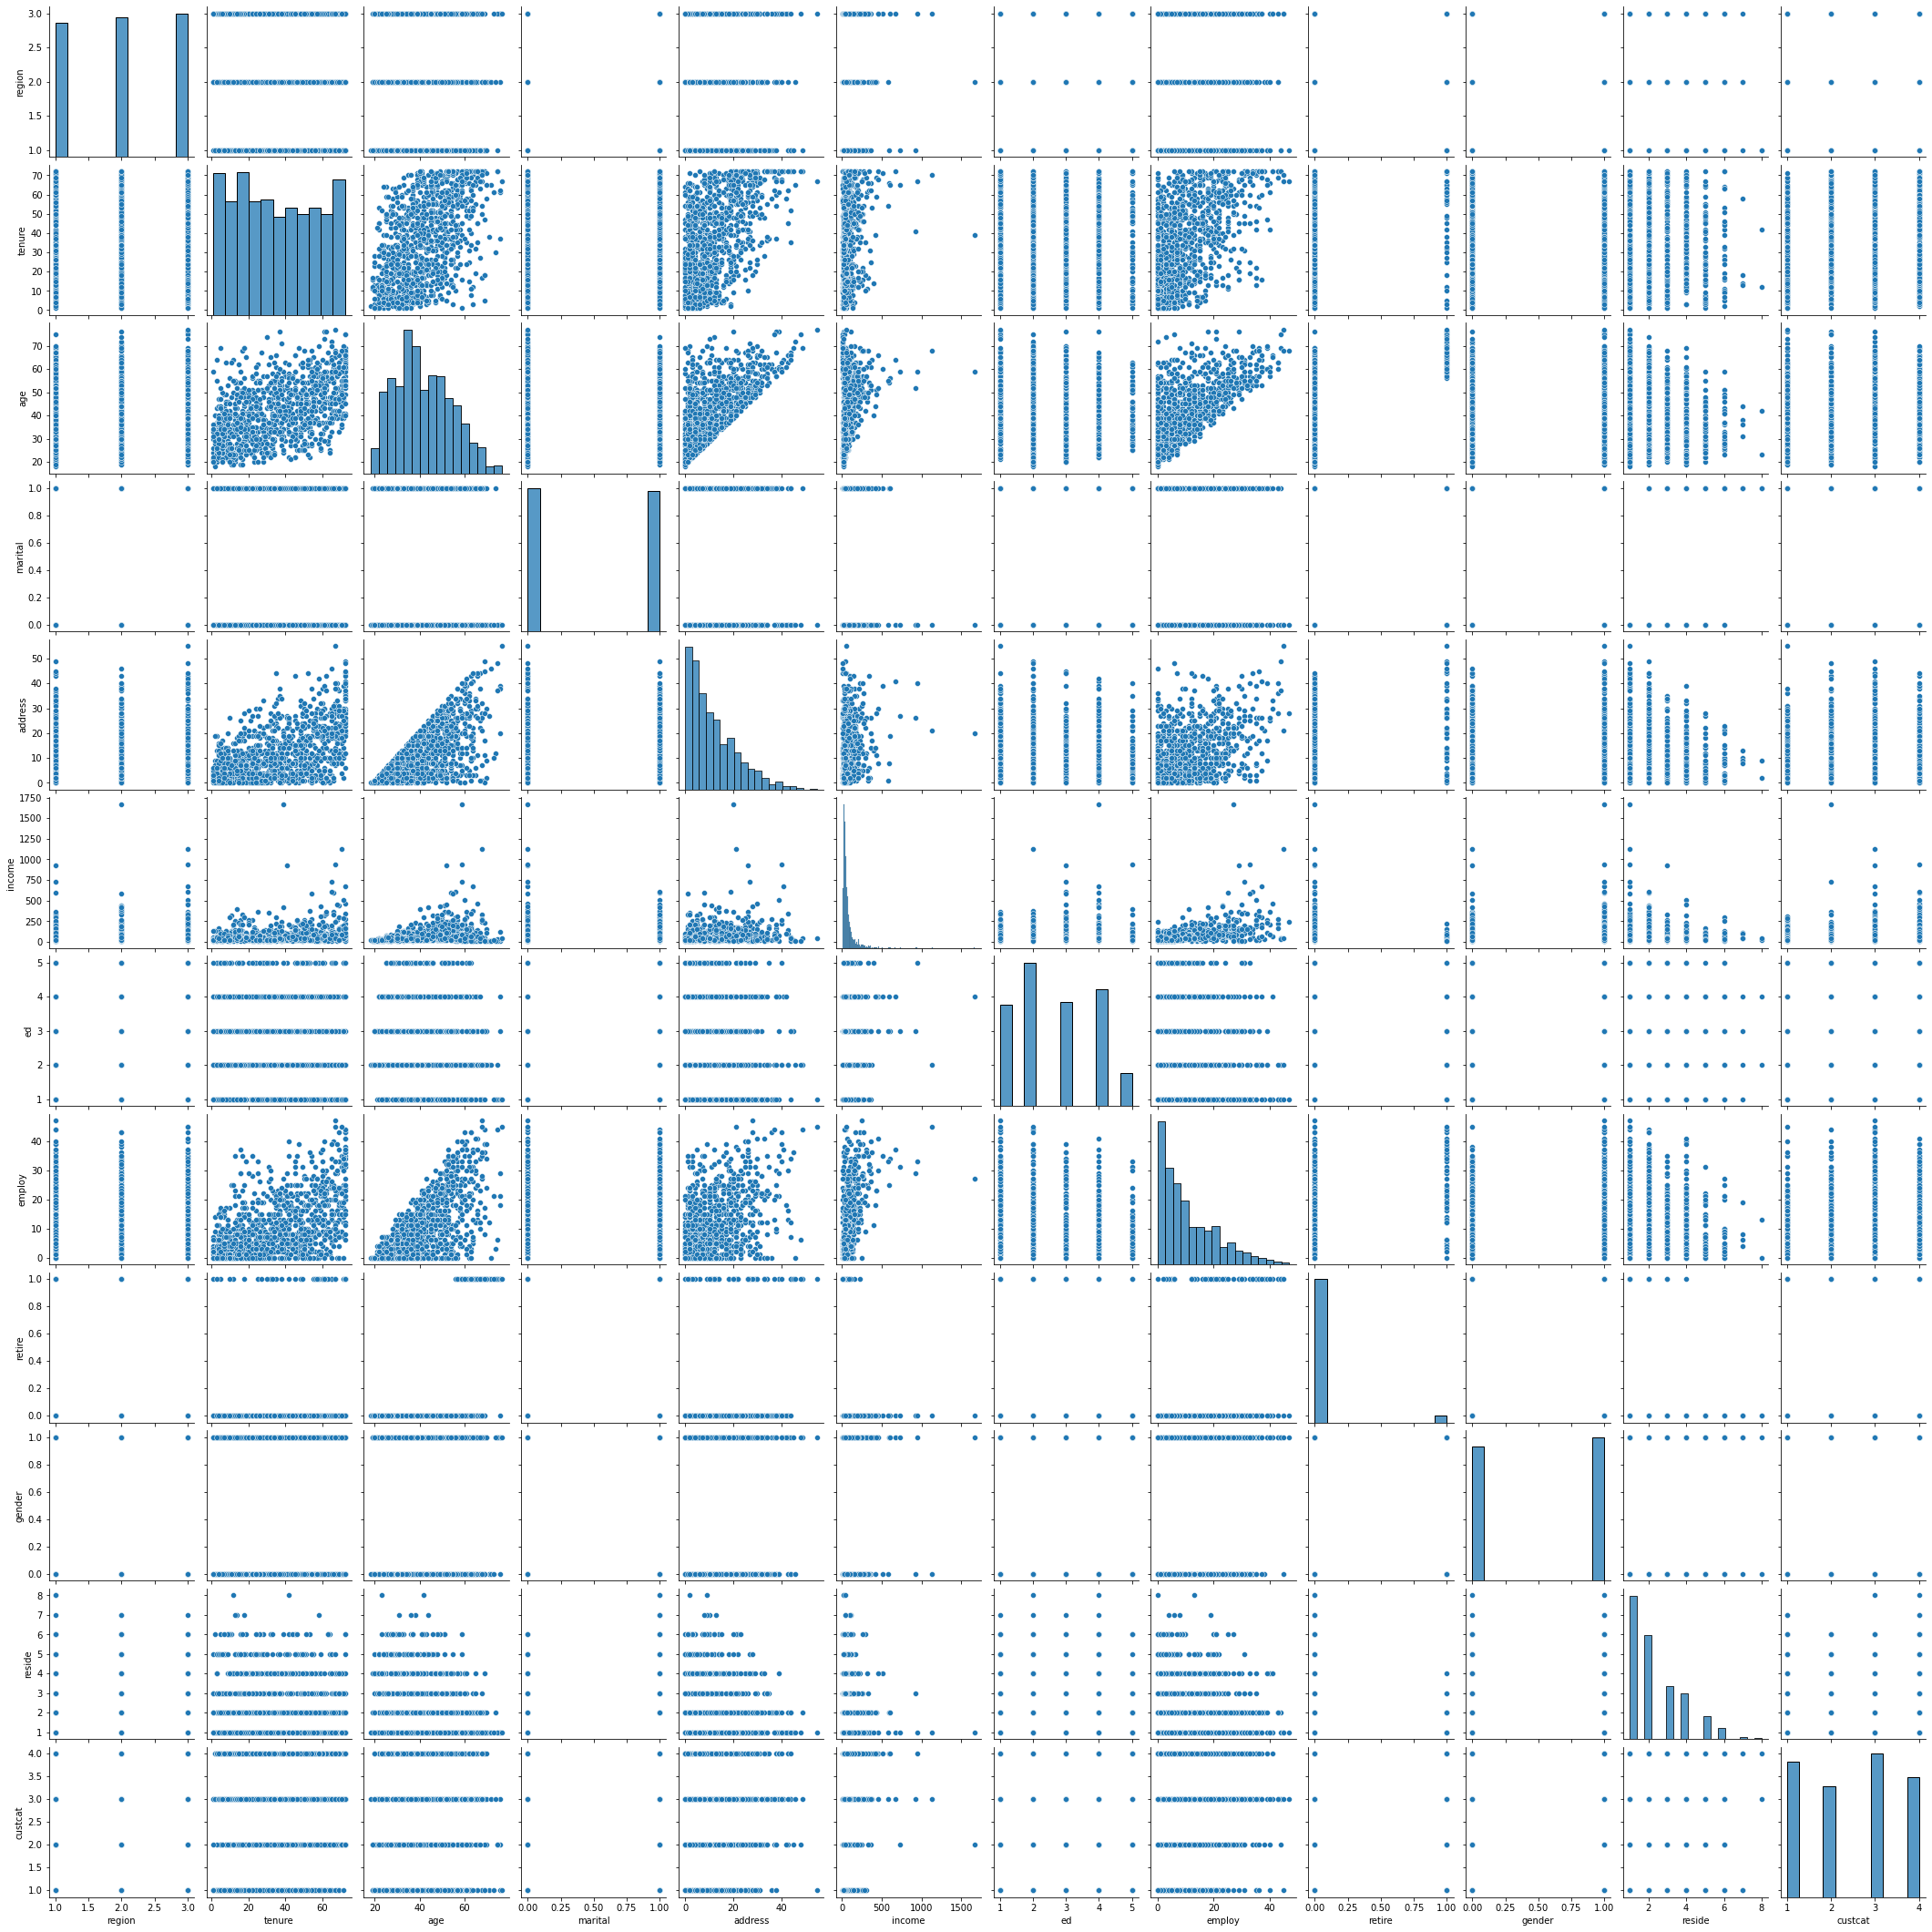

In [11]:
sns.pairplot(data=tele_data)
plt.show()

####  check income using histogram

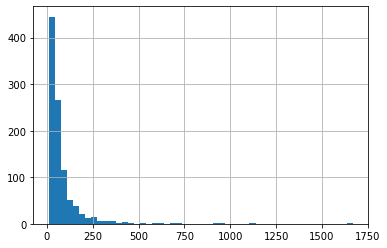

In [12]:
tele_data['income'].hist(bins=50)
plt.show()

## Feature set

In [13]:
## define feature sets X:
tele_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
tele_data.values

array([[ 2, 13, 44, ...,  0,  2,  1],
       [ 3, 11, 33, ...,  0,  6,  4],
       [ 3, 68, 52, ...,  1,  2,  3],
       ...,
       [ 3, 67, 59, ...,  1,  1,  4],
       [ 3, 70, 49, ...,  1,  1,  3],
       [ 3, 50, 36, ...,  1,  3,  2]], dtype=int64)

#### To use scikit-learn library, we have to convert pandas dataframe into numpy array

In [16]:
X=tele_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values
X

array([[ 2, 13, 44, ...,  0,  2,  1],
       [ 3, 11, 33, ...,  0,  6,  4],
       [ 3, 68, 52, ...,  1,  2,  3],
       ...,
       [ 3, 67, 59, ...,  1,  1,  4],
       [ 3, 70, 49, ...,  1,  1,  3],
       [ 3, 50, 36, ...,  1,  3,  2]], dtype=int64)

#### What are our labels?

In [17]:
y=tele_data['custcat'].values
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

## Normalize/ Standardize data

#### Data Standardization give data zero mean and unit variance, it is good practice,especially for algorithms such as KNN which is based on distance of cases:

In [18]:
## Importing necessary library 
from sklearn import preprocessing

In [19]:
## Instantiating the object
scaler=preprocessing.StandardScaler()
scaler

StandardScaler()

In [20]:
## Training / Fitting the scalesfor input features X
scaler.fit(X)

StandardScaler()

In [21]:
# Transforming / Applying on input features X(standardization)
X_scaled=scaler.transform(X)
X_scaled

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601, ...,  0.96655883,
        -0.23065004,  0.45813963],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ...,  0.96655883,
        -0.92747794,  1.35119935],
       [ 1.19883553,  1.61477311,  0.58283046, ...,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.67796676, -0.45281689, ...,  0.96655883,
         0.46617787, -0.43492008]])

In [22]:
X

array([[ 2, 13, 44, ...,  0,  2,  1],
       [ 3, 11, 33, ...,  0,  6,  4],
       [ 3, 68, 52, ...,  1,  2,  3],
       ...,
       [ 3, 67, 59, ...,  1,  1,  4],
       [ 3, 70, 49, ...,  1,  1,  3],
       [ 3, 50, 36, ...,  1,  3,  2]], dtype=int64)

## Train Test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)

print("-"*40)
print(y_train.shape)
print(y_test.shape)

(800, 12)
(200, 12)
----------------------------------------
(800,)
(200,)


In [27]:
X_train

array([[-0.02696767, -1.055125  , -0.69181243, ...,  0.96655883,
        -0.23065004, -0.43492008],
       [ 1.19883553, -0.21199928, -0.61214725, ...,  0.96655883,
         1.16300577,  0.45813963],
       [-1.25277087,  1.70845375,  2.65412517, ...,  0.96655883,
        -0.92747794, -0.43492008],
       ...,
       [ 1.19883553, -0.72724277, -0.13415616, ...,  0.96655883,
        -0.92747794, -0.43492008],
       [ 1.19883553,  0.44376517, -0.93080797, ..., -1.03459817,
         1.16300577,  1.35119935],
       [-0.02696767, -1.10196531, -1.40879906, ..., -1.03459817,
        -0.92747794,  0.45813963]])

In [28]:
y_train

array([2, 3, 2, 3, 2, 3, 2, 3, 4, 1, 1, 3, 3, 3, 3, 1, 4, 2, 2, 3, 4, 2,
       2, 3, 2, 3, 3, 4, 1, 4, 3, 4, 1, 1, 2, 4, 3, 1, 2, 4, 1, 4, 4, 4,
       2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 3, 4, 3, 2, 2, 3, 1, 4, 2, 3, 2, 3,
       4, 1, 1, 2, 1, 3, 4, 1, 1, 2, 1, 3, 1, 4, 1, 4, 4, 4, 1, 3, 3, 3,
       1, 1, 3, 2, 2, 3, 4, 2, 1, 3, 4, 3, 3, 4, 2, 3, 4, 2, 2, 4, 4, 2,
       3, 1, 3, 2, 4, 2, 3, 1, 1, 1, 4, 2, 2, 1, 4, 2, 1, 1, 1, 2, 3, 2,
       1, 1, 1, 3, 2, 3, 3, 3, 3, 1, 4, 2, 3, 2, 2, 1, 2, 3, 1, 3, 1, 1,
       3, 1, 3, 2, 1, 3, 4, 2, 1, 3, 2, 1, 3, 3, 3, 2, 2, 2, 4, 1, 2, 4,
       2, 2, 3, 3, 1, 1, 2, 4, 3, 3, 2, 4, 3, 3, 1, 3, 4, 1, 1, 2, 3, 4,
       2, 4, 3, 1, 4, 1, 2, 4, 4, 1, 2, 4, 1, 1, 1, 1, 3, 4, 3, 1, 4, 1,
       1, 1, 1, 1, 2, 3, 3, 4, 3, 4, 3, 3, 2, 4, 3, 1, 2, 1, 4, 1, 3, 3,
       1, 1, 4, 3, 4, 3, 1, 1, 3, 2, 4, 3, 1, 1, 3, 4, 1, 2, 3, 2, 4, 1,
       1, 2, 3, 3, 2, 2, 2, 2, 4, 3, 3, 2, 4, 3, 2, 1, 2, 1, 3, 3, 2, 4,
       1, 1, 1, 4, 3, 3, 3, 4, 4, 4, 3, 1, 4, 3, 2,

## Classification

### Build a K nearest neighbour(KNN)

#### Import library

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

In [31]:
knn=KNeighborsClassifier(n_neighbors=4)
knn

KNeighborsClassifier(n_neighbors=4)

In [32]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

#### Predicting

In [43]:
X_test_predicted=knn.predict(X_test)
X_test_predicted

array([2, 2, 3, 2, 1, 3, 4, 2, 1, 1, 1, 3, 3, 3, 1, 4, 4, 1, 4, 1, 1, 1,
       3, 1, 1, 3, 2, 4, 1, 2, 2, 4, 1, 3, 4, 1, 1, 1, 4, 2, 3, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 1, 2, 1, 3, 1, 1, 3, 1, 4, 1, 3, 2, 3, 2, 1, 2,
       1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 3, 1, 2, 4,
       2, 2, 4, 1, 2, 3, 3, 2, 2, 4, 4, 1, 2, 3, 1, 2, 4, 1, 1, 3, 1, 2,
       4, 4, 4, 3, 1, 1, 1, 1, 3, 4, 3, 2, 3, 3, 4, 4, 1, 2, 4, 2, 1, 4,
       1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 4, 4, 4, 3, 1, 4, 3, 1, 2, 1, 2,
       2, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 1, 4, 2, 3, 1, 3, 1, 2, 3, 1, 2,
       4, 4, 3, 3, 3, 3, 2, 3, 1, 4, 3, 2, 3, 1, 4, 1, 3, 1, 2, 1, 1, 4,
       4, 3], dtype=int64)

#### Accuracy Evaluation

In [34]:
from sklearn import metrics

In [36]:
# Training accuracy
metrics.accuracy_score(y_train,knn.predict(X_train))

0.8425

In [44]:
# Test accuracy
metrics.accuracy_score(y_test,X_test_predicted)

0.73

### Build a knn model with various K value and Decide the best K value

In [47]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfusionMx=[];

for n in range(1,ks):
    
    # train model and predict
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.735, 0.735, 0.72 , 0.73 , 0.685, 0.725, 0.71 , 0.74 , 0.73 ])

### Plot model accuracy for different number of neighbors

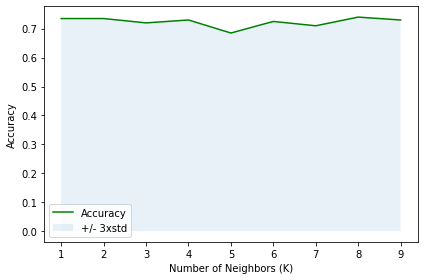

In [49]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc+1*std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
# with best value of k
knn=KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [52]:
X_test_predicted=knn.predict(X_test)
X_test_predicted

array([2, 2, 3, 2, 1, 3, 4, 2, 1, 1, 1, 3, 3, 3, 1, 4, 4, 1, 4, 1, 1, 1,
       3, 1, 1, 3, 2, 4, 1, 2, 2, 4, 1, 3, 4, 1, 1, 1, 4, 2, 3, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 1, 2, 1, 3, 1, 1, 3, 1, 4, 1, 3, 2, 3, 2, 1, 2,
       1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 3, 1, 2, 4,
       2, 2, 4, 1, 2, 3, 3, 2, 2, 4, 4, 1, 2, 3, 1, 2, 4, 1, 1, 3, 1, 2,
       4, 4, 4, 3, 1, 1, 1, 1, 3, 4, 3, 2, 3, 3, 4, 4, 1, 2, 4, 2, 1, 4,
       1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 4, 4, 4, 3, 1, 4, 3, 1, 2, 1, 2,
       2, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 1, 4, 2, 3, 1, 3, 1, 2, 3, 1, 2,
       4, 4, 3, 3, 3, 3, 2, 3, 1, 4, 3, 2, 3, 1, 4, 1, 3, 1, 2, 1, 1, 4,
       4, 3], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
print(confusion_matrix(y_test, X_test_predicted))

[[55  5  0  0]
 [11 22  6  0]
 [ 0 10 39  6]
 [ 1  1 14 30]]


In [55]:
print(classification_report(y_test,X_test_predicted))

              precision    recall  f1-score   support

           1       0.82      0.92      0.87        60
           2       0.58      0.56      0.57        39
           3       0.66      0.71      0.68        55
           4       0.83      0.65      0.73        46

    accuracy                           0.73       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.73      0.73      0.73       200

